In [8]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.optimize import curve_fit
import datetime
import csv

## Calibrate the position vs voltage

In [9]:
Voltage1 = [0, 9.97, 15.1, 22.09, 30.0, 40.44, 50, 60, 70, 80.1, 90.4, 100, 105, 110, 112.5, 115.1, 117.4, 120, \
           122.5, 125, 125.8, 126.9]
Voltage2 = [-10.41, -20.3, -30, -40.37, -49.87, -60, -70.3, -80.4, -90.2, -99.9, -105.1, -110.2, -112.6, \
            -115.0, -117.5, -120, -122.5, -125.0, -125.9, -127.3]
Position1 = [1676, 1688, 1696, 1713, 1739, 1785, 1842, 1914, 2009, 2119, 2259, 2408, 2495, 2592, 2641, 2701, \
             2752, 2815, 2880, 2952, 2975, 3002]
Position2 = [2994, 2974, 2943, 2894, 2837, 2759, 2664, 2555, 2424, 2276, 2180, 2075, 2024, 1971, 1914, \
             1851, 1786, 1719, 1691, 1654]
Voltage2_rev = Voltage2[::-1]
Position2_rev = Position2[::-1]

p1 = []
p2 = []
for i in range(len(Position1)):
    p1.append(Position1[i] - 1676)
for i in range(len(Position2_rev)):
    p2.append(Position2_rev[i] - 3000)

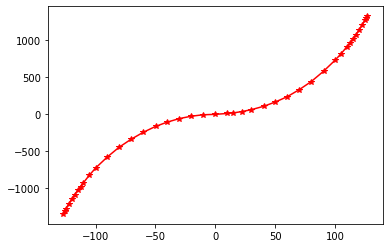

In [10]:
V = np.concatenate((Voltage2_rev, Voltage1))
P = np.concatenate((p2, p1))
plt.plot(V,P, 'r*-')

(array([-12.5, -10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,
         10. ,  12.5]), <a list of 11 Text yticklabel objects>)

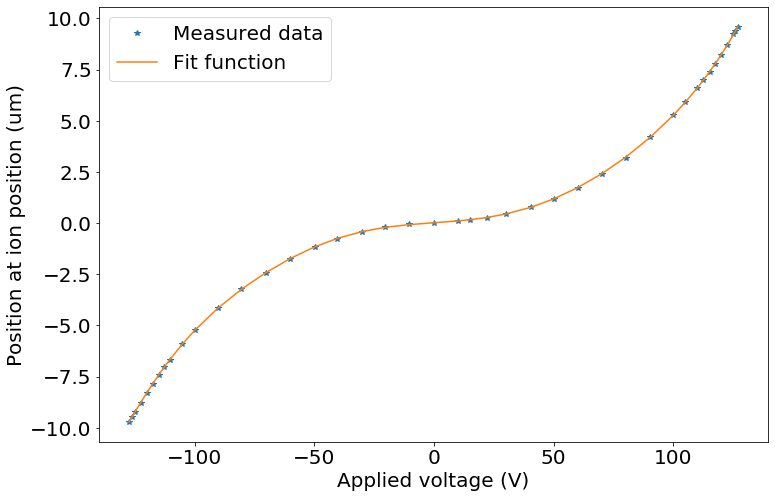

In [11]:
z = np.polyfit(V, P, 10)
p = np.poly1d(z)
plt.figure(figsize=(12,8))
plt.plot(V, P/138.48257339222658, '*', label = 'Measured data')
plt.plot(V, p(V)/138.48257339222658, '-',label = 'Fit function')
plt.xlabel('Applied voltage (V)')
plt.ylabel('Position at ion position (um)')
plt.legend(prop={'size': 20})
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)

## Get the mutification factor from Fourier plane to ion position

In [220]:
VoltAt2p5um = 4.75*15
MulificationFactor = p(VoltAt2p5um)/2.5
MulificationFactor

138.48257339222658

In [221]:
Rabi = []
Volt = []
with open('MEMS_tilt_Ind1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            if row[0] is not '':
                Rabi.append(row[0])
                Volt.append(row[1])
            line_count += 1

Rabi = [float(Rabi[i]) for i in range(len(Rabi))]
Volt = [float(Volt[i]) for i in range(len(Volt))]

Column names are RF670, M1, M2


Text(0.5, 1.0, 'Individual beam 1')

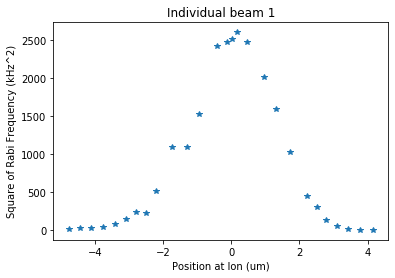

In [222]:
PosAtFourierPlane = p([Volt[i]*15 for i in range(len(Volt))])
PosAtIon = [PosAtFourierPlane[i]/MulificationFactor for i in range(len(PosAtFourierPlane))]
plt.plot(PosAtIon, np.array(Rabi)**2 , '*')
plt.xlabel('Position at Ion (um)')
plt.ylabel('Square of Rabi Frequency (kHz^2)')
plt.title('Individual beam 1')

In [223]:
## Rabi Crosstalk at +4.159 um
Rabi_4p159 = Rabi[12]
CrossTalk_4p159 = Rabi_4p159/max(Rabi)

## Rabi Crosstalk at -4.778 um
Rabi_m4p778 = Rabi[-1]
CrossTalk_m4p778 = Rabi_m4p778/max(Rabi)

print('Individual beam 1, Rabi frequency crosstalk:')
print('Crosstalk at +4.159 um is ', CrossTalk_4p159)
print('Crosstalk at -4.778 um is ', CrossTalk_m4p778)

Individual beam 1, Rabi frequency crosstalk:
Crosstalk at +4.159 um is  0.02765882875844636
Crosstalk at -4.778 um is  0.0811183361626557


In [224]:
def sort(ls):
    temp = ls[:13]
    temp2 = ls[13:][::-1]
    sortedls = np.concatenate((temp2, temp))
    return sortedls
PosAtIon_sorted = sort(PosAtIon)
Rabi_sorted = sort(Rabi)
PosAtIon_sorted
Rabi_sorted

array([ 4.1429,  4.8127,  5.0951,  6.0449,  9.0597, 12.0432, 15.2961,
       14.872 , 22.7542, 33.1466, 33.0046, 39.1699, 49.2344, 49.7785,
       50.256 , 51.0723, 49.8181, 44.9518, 39.9174, 32.1101, 21.289 ,
       17.509 , 11.41  ,  7.504 ,  4.325 ,  1.5309,  1.4126])

sigma =  -1.202749502821846


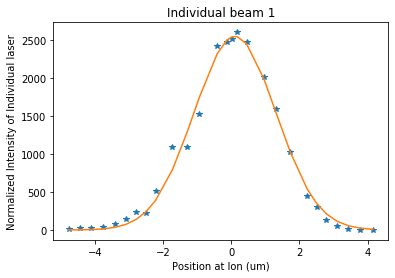

In [227]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, PosAtIon_sorted, Rabi_sorted**2, p0 = [1, 0, 1])

plt.plot(PosAtIon_sorted, Rabi_sorted**2, '*',label = 'Measured data')
plt.plot(PosAtIon_sorted, gauss_function(PosAtIon_sorted, *popt), label='Gaussian fit')

plt.xlabel('Position at Ion (um)')
plt.ylabel('Normalized Intensity of Individual laser')
plt.title('Individual beam 1')
print('sigma = ', popt[2])

sigma =  1.202748939716351


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

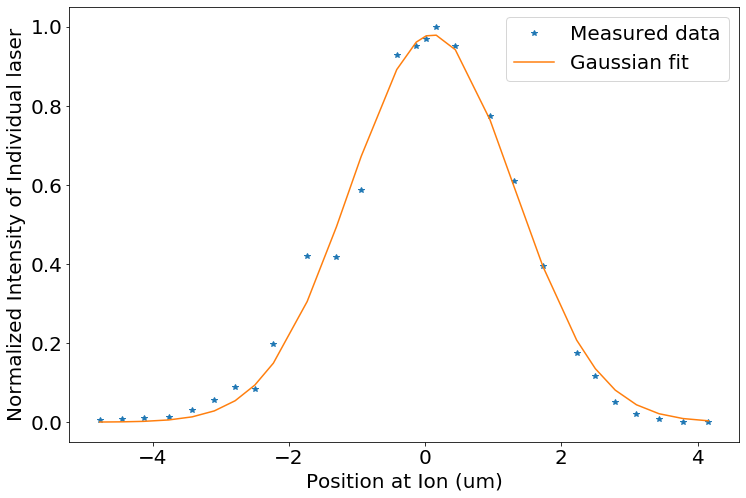

In [229]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, PosAtIon_sorted, Rabi_sorted**2/max(Rabi_sorted**2), p0 = [1, 0, 1])

plt.figure(figsize=(12,8))
plt.plot(PosAtIon_sorted, Rabi_sorted**2/max(Rabi_sorted**2), '*',label = 'Measured data')
plt.plot(PosAtIon_sorted, gauss_function(PosAtIon_sorted, *popt), label='Gaussian fit')

plt.xlabel('Position at Ion (um)')
plt.ylabel('Normalized Intensity of Individual laser')
#plt.title('Individual beam 1')
print('sigma = ', popt[2])
plt.legend(prop={'size': 20})
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
#axes.title.set_size(20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)

### Ind 2

In [206]:
Rabi = []
Volt = []
with open('MEMS_tilt_Ind2.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            if row[0] is not '':
                Rabi.append(row[0])
                Volt.append(row[1])
            line_count += 1

Rabi2 = [float(Rabi[i]) for i in range(len(Rabi))]
Volt2 = [float(Volt[i]) for i in range(len(Volt))]

Column names are RF670, M1, M2, 


In [207]:
Rabi = Rabi2[:58]
Volt = Volt2[:58]

Text(0.5, 1.0, 'Individual beam 2')

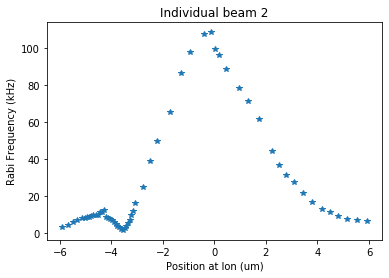

In [208]:
PosAtFourierPlane = p([Volt[i]*15 for i in range(len(Volt))])
PosAtIon = [PosAtFourierPlane[i]/MulificationFactor for i in range(len(PosAtFourierPlane))]
plt.plot(PosAtIon, Rabi, '*')
plt.xlabel('Position at Ion (um)')
plt.ylabel('Rabi Frequency (kHz)')
plt.title('Individual beam 2')

In [209]:
def sort2(ls):
    temp = ls[:18]
    temp2 = ls[18:][::-1]
    sortedls = np.concatenate((temp2, temp))
    return sortedls
PosAtIon_sorted = sort2(PosAtIon)
Rabi_sorted = sort2(Rabi)
print(PosAtIon_sorted)
print(Rabi_sorted)

[-5.90291443 -5.70046518 -5.50434428 -5.314311   -5.13011546 -5.04012738
 -4.95150316 -4.86421093 -4.77821898 -4.69349588 -4.61001054 -4.52773233
 -4.44663113 -4.36667738 -4.28784217 -4.21009728 -4.13341523 -4.05776934
 -3.98313371 -3.90948334 -3.83679409 -3.76504272 -3.69420691 -3.62426531
 -3.55519748 -3.48698397 -3.41960628 -3.35304685 -3.28728911 -3.22231743
 -3.15811712 -3.09467445 -2.78840783 -2.49952818 -2.2272546  -1.7313636
 -1.30093817 -0.93800196 -0.41565889 -0.1301073   0.01686202  0.16355054
  0.4441049   0.95216756  1.30659388  1.73085064  2.22572466  2.5
  2.79255867  3.10390233  3.43475547  3.78611172  4.15928033  4.47463082
  4.8060492   5.15476919  5.52223396  5.91012042]
[  3.307     4.3625    6.05268   7.27518   8.1283    8.29502   8.91214
   8.85963   9.35096   9.6822    9.77092   9.81958  11.2522   11.7125
  12.4364    8.81973   8.33627   7.67042   7.02434   6.21996   5.25317
   4.10269   3.14282   2.3071    1.8       2.753     4.14      5.778
   7.1712    9.86603

In [210]:
PosAtIon_sorted[14]

-4.287842166494496

In [211]:
Rabi_sorted[14]

12.4364

In [212]:
## Rabi Crosstalk at +4.81 um
Rabi_4p81 = Rabi_sorted[-4]
CrossTalk_4p81 = Rabi_4p81/max(Rabi_sorted)

## Rabi Crosstalk at -5.04 um
Rabi_m5p04 = Rabi_sorted[5]
CrossTalk_m5p04 = Rabi_m5p04/max(Rabi_sorted)

## Rabi Crosstalk at -4.29 um
Rabi_m4p29 = Rabi_sorted[14]
CrossTalk_m4p29 = Rabi_m4p29/max(Rabi_sorted)


print('Individual beam 2, , Rabi frequency crosstalk:')
print('Crosstalk at +4.81 um is ', CrossTalk_4p81)
print('Crosstalk at -5.04 um is ', CrossTalk_m5p04)
print('Local maximum: \nCrosstalk at -4.29 um is ', CrossTalk_m4p29)

Individual beam 2, , Rabi frequency crosstalk:
Crosstalk at +4.81 um is  0.08661007601592013
Crosstalk at -5.04 um is  0.07624589817359571
Local maximum: 
Crosstalk at -4.29 um is  0.11431250172345647


Amp =  10797.086392020972 
 Mean =  -0.2302828505895428 
 sigma =  1.1905729911783214


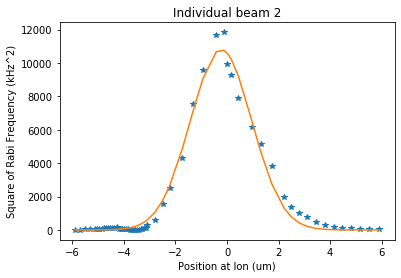

In [167]:
popt, pcov = curve_fit(gauss_function, PosAtIon_sorted, Rabi_sorted**2, p0 = [12000, 0, 1])
plt.plot(PosAtIon_sorted, Rabi_sorted**2, '*', PosAtIon_sorted, gauss_function(PosAtIon_sorted, *popt), label='fit')

plt.xlabel('Position at Ion (um)')
plt.ylabel('Square of Rabi Frequency (kHz^2)')
plt.title('Individual beam 2')
print('Amp = ',popt[0], '\n','Mean = ', popt[1],'\n', 'sigma = ', popt[2])